<center><h1 style="font-family:verdana;"><strong>Prediksi Tinggal atau Keluarnya Karyawan Perusahaan</strong></h1></center>
<center><h2><strong><font color="red">Project Ilmu Data</font></strong></h2></center>
<img alt="" src="images/cover1.jpg" style="width: 1000px"/>

<p>bit.ly/ProjectIlmuData</P>

<h1><strong>Latar Belakang</strong></h1>

<p1>Perusahaan tidak bisa berjalan tanpa karyawan. Perusahaan yang baik pasti juga memperhatikan para karyawannya, karena jika para karyawan tidak merasa nyaman perusahaan juga tidak akan berjalan sebagaimana mestinya. Bagaimana perusahaan tahu apa yang harus dilakukan untuk membuat karyawannya tetap nyaman dan tidak mengundurkan diri ? Ini adalah salah satu bentuk manfaat <strong>Data Science</strong>. Dengan <strong>Data Science</strong> kita bisa mengetahui apa yang mempengaruhi kenyamanan para karyawan, sehingga tidak mengundurkan diri.</p1>

<p2>Data yang digunakan di sini adalah data yang berasal dari kaggle, data ini bukanlah data real.</p2>


In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('Data_karyawan.csv', sep=',')
data.head()

avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  
0                NaN     low      0.829896      Left     5.0  
1                NaN     low      0.834544  Employed     2.0  
2                NaN  medium      0.834988  Employed     3.0  
3                NaN     low      0.424764  Employed     2.0  
4                NaN     low      0.779043  Employed     3.0

<p><strong>Jika dilihat</strong> kolom yang ingin diprediksi tidak berada di paling kanan. Sebenarnya tidak perlu dilakukan, hanya agar lebih mudah, kolom status akan dipindahkan ke paling kanan. Berikut adalah hasilnya.</p>

In [2]:
data.reset_index(inplace=True)
data1 = data.loc[:,['index','status']]
data.drop(columns='status', inplace=True)
data = pd.merge(data,data1,on='index')
data.drop(columns='index', inplace=True)
data.head()

avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              NaN         0.932868           4   
1              232      support              NaN              NaN           3   
2              184        sales              NaN         0.788830           3   
3              206        sales              NaN         0.575688           4   
4              249        sales              NaN         0.845217           3   

   recently_promoted  salary  satisfaction  tenure    status  
0                NaN     low      0.829896     5.0      Left  
1                NaN     low      0.834544     2.0  Employed  
2                NaN  medium      0.834988     3.0  Employed  
3                NaN     low      0.424764     2.0  Employed  
4                NaN     low      0.779043     3.0  Employed

<p>Pertama-tama akan dijelaskan masing-masing kolom yang terdapat pada data<p>
<ul>
    <li>avg_monthly_hrs = Rata-rata jam bekerja tiap bulan karyawan</li>
	<li>department = Departemen karyawan</li>
	<li>filed_complaint = Pernah atau tidak mengisi keluhan</li>
	<li>last_evaluation = Nilai pada evaluasi terakhir</li>
	<li>n_project = Banyaknya proyek yang pernah diambil</li>
	<li>recently_promoted = Baru mendapatkan promosi</li>
    <li>salary = Gaji (Dengan tingkatan, bukan numerik)</li>
    <li>satisfaction = Kepuasan bekerja pada perusahaan</li>
    <li>tenure = Masa jabatan</li>
    <li>status = Status karyawan saat ini</li>
</ul>

<p>Lalu akan diberikan statistik deskriptif setiap kolom sebelum pengisian missing value</p>

In [3]:
data.describe(include='all')

avg_monthly_hrs department  filed_complaint  last_evaluation  \
count      14249.000000      13540           2058.0     12717.000000   
unique              NaN         12              NaN              NaN   
top                 NaN      sales              NaN              NaN   
freq                NaN       3923              NaN              NaN   
mean         199.795775        NaN              1.0         0.718477   
std           50.998714        NaN              0.0         0.173062   
min           49.000000        NaN              1.0         0.316175   
25%          155.000000        NaN              1.0         0.563866   
50%          199.000000        NaN              1.0         0.724939   
75%          245.000000        NaN              1.0         0.871358   
max          310.000000        NaN              1.0         1.000000   

          n_projects  recently_promoted salary  satisfaction        tenure  \
count   14249.000000              300.0  14249  14068.000000  14068.000000   
unique           NaN                NaN      3           NaN           NaN   
top              NaN                NaN    low           NaN           NaN   
freq             NaN                NaN   6952           NaN           NaN   
mean        3.773809                1.0    NaN      0.621295      3.497228   
std         1.253126                0.0    NaN      0.250469      1.460917   
min         1.000000                1.0    NaN      0.040058      2.000000   
25%         3.000000                1.0    NaN      0.450390      3.000000   
50%         4.000000                1.0    NaN      0.652527      3.000000   
75%         5.000000                1.0    NaN      0.824951      4.000000   
max         7.000000                1.0    NaN      1.000000     10.000000   

          status  
count      14249  
unique         2  
top     Employed  
freq       10857  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

<p>Akan diberikan grafik statisik untuk masing-masing kolom</p>

In [4]:
#Menyiapkan fungsi untuk menggambar
A = ['b','g','r','c','m','y','k']
def bar(a,dat):
    sns.set(rc={'figure.figsize':(15,6)})
    ax=sns.countplot(x=dat.loc[~dat.loc[:,a].isna(),a], data=dat)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def distribusi(x, dat):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15, 6),
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(dat.loc[~dat.loc[:,x].isna(),x], ax=ax_box, color=random.choice(A)).set_xlabel('')
    sns.distplot(dat.loc[~dat.loc[:,x].isna(),x], ax=ax_hist, color=random.choice(A))

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

<h3>avg_monthly_hrs</h3>

Mean avg_monthly_hrs adalah 199.79577514211525


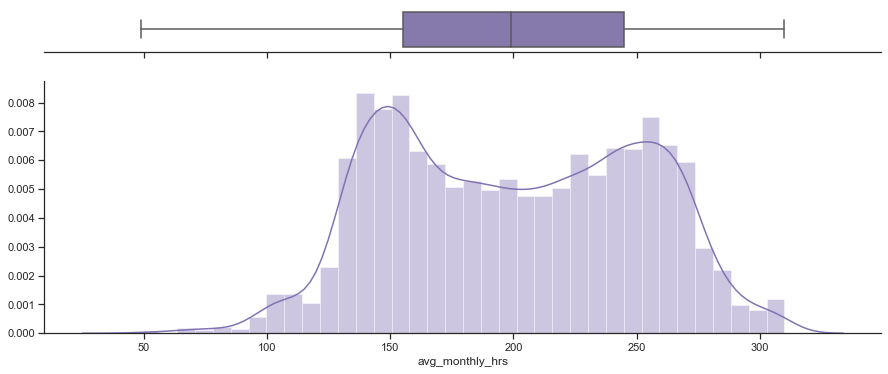

In [5]:
#Menggunakan distplot karena numerik kontinu
print('Mean avg_monthly_hrs adalah',data.avg_monthly_hrs.mean())
distribusi('avg_monthly_hrs', data)

<h3>last_evaluation</h3>

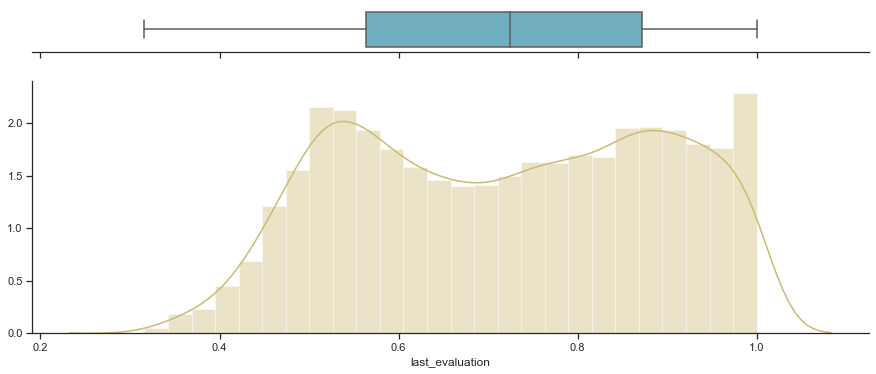

In [6]:
distribusi('last_evaluation', data)

<h3>satisfaction</h3>

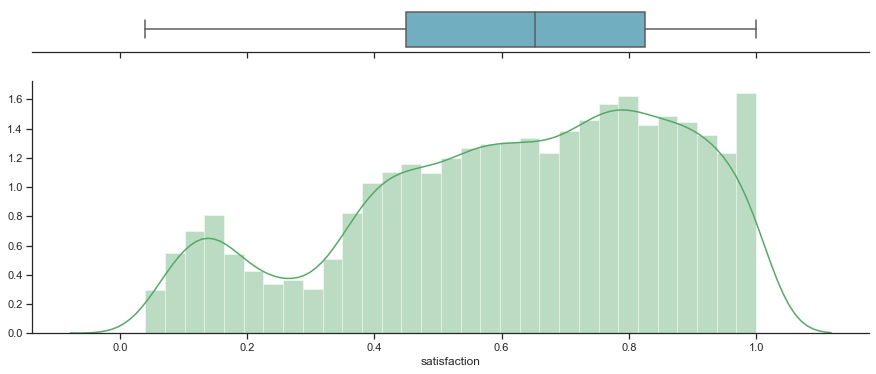

In [7]:
distribusi('satisfaction',data)

<h3>department</h3>

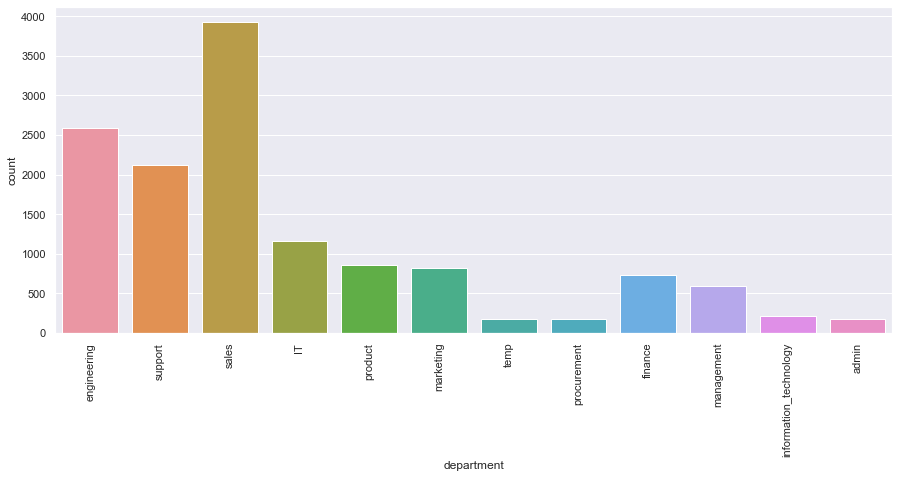

In [8]:
bar('department', data)

<h3>filed_complaint</h3>

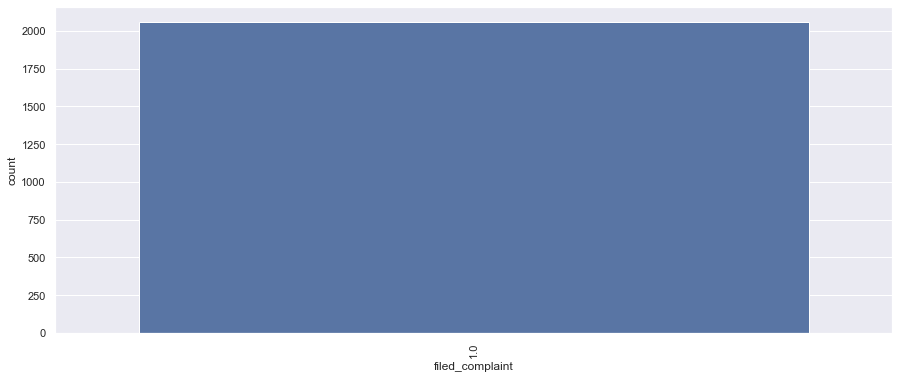

In [9]:
bar('filed_complaint', data)

<h3>n_projects</h3>

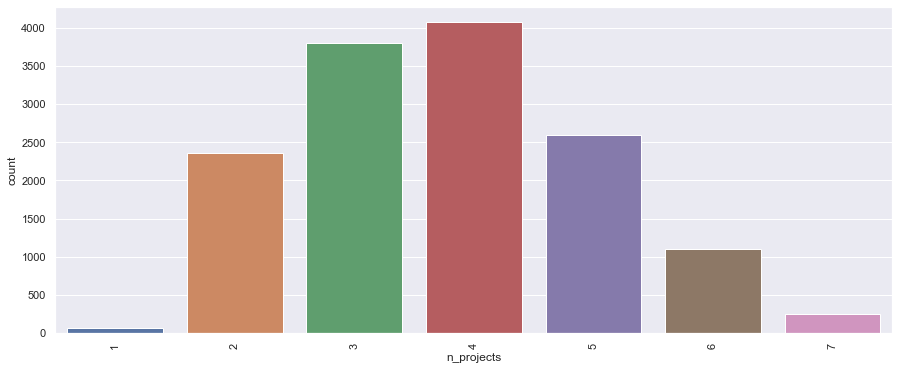

In [10]:
bar('n_projects', data)

<h3>recently_promoted</h3>

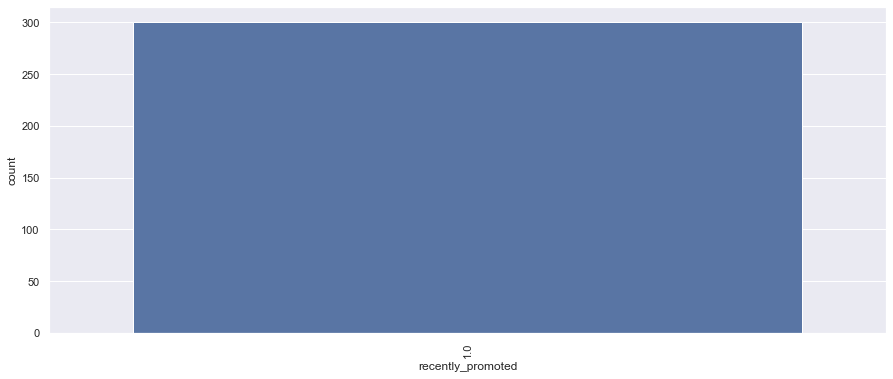

In [11]:
bar('recently_promoted', data)

<h3>salary</h3>

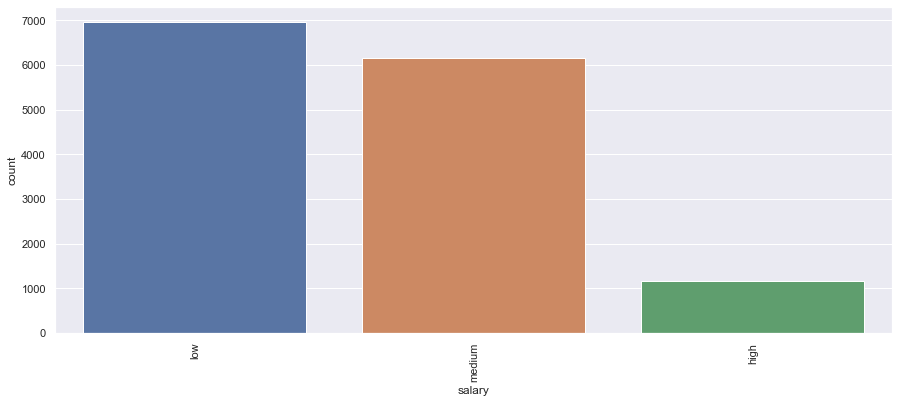

In [12]:
bar('salary', data)

<h3>tenure</h3>

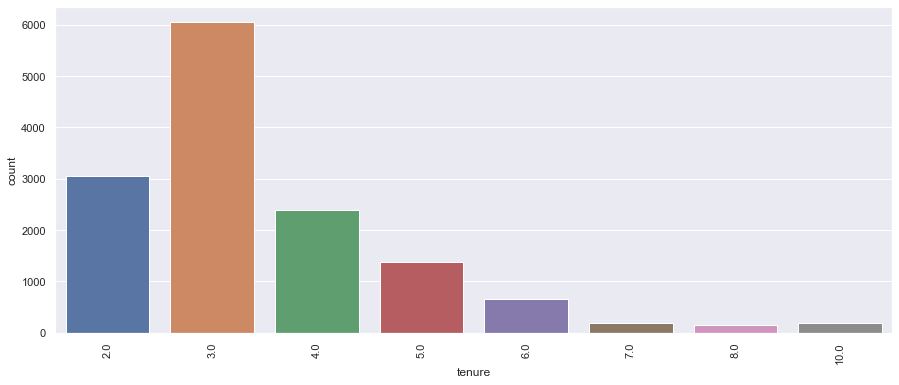

In [13]:
bar('tenure', data)

<h3>status</h3>

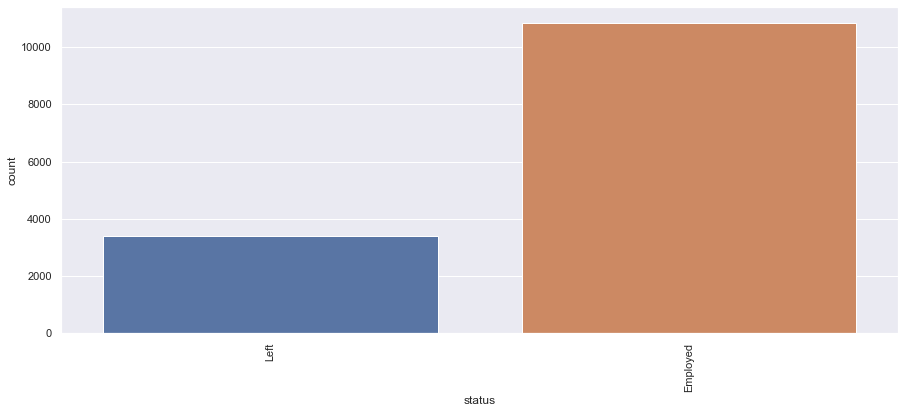

In [14]:
bar('status', data)

<p><strong>Setelah itu</strong> akan dilihat berapa banyak missing value pada setiap kolom, dan juga tipe datanya.</p>

In [15]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
tenure               14068 non-null float64
status               14249 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 4.0 MB


<center><h2>Pre-Processing</h2></center>


<p><strong>Beberapa</strong>  missing value sebenarnya bisa diisi langsung tanpa harus pre-processing lebih lanjut. Contoh missing yang bisa diisi langsung adalah <strong>filed_complaint, recently_promoted</strong>, karena hanya memberi informasi "ya" yang bernilai 1, dan  dengan penalaran biasa, missing value akan direpresentasikan sebagai "tidak". Missing value yang seperti ini akan langsung diganti dengan angka 0 agar lebih mudah dianalisa.</p>

<p>Lalu untuk <strong>last_evaluation, tenure</strong>, dan <strong>satisfaction</strong> missing valuenya akan diisi dengan <strong>random value</strong> yang dipilih secara acak dari nilai-nilai yang sudah ada pada data, dengan asumsi data yang terbanyak akan lebih sering muncul.</p>

<p>Lalu missing value pada <strong>department</strong> akan <strong>dihilangkan</strong>, karena kita tidak mempunyai informasi apapun untuk mengisi hal ini.</p>

In [16]:
data1 = data.copy()

In [17]:
data = data[~data.loc[:,'department'].isna()]
nol = ['filed_complaint', 'recently_promoted']
for a in nol:
    data[a].fillna(value=0,inplace=True)
random = ['last_evaluation','tenure','satisfaction']
for a in random:
    s = data[a].value_counts(normalize=True)
    missing = data[a].isnull()
    data.loc[missing,a] = np.random.choice(s.index, size=len(data[missing]),p=s.values)
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13540 entries, 0 to 14247
Data columns (total 10 columns):
avg_monthly_hrs      13540 non-null int64
department           13540 non-null object
filed_complaint      13540 non-null float64
last_evaluation      13540 non-null float64
n_projects           13540 non-null int64
recently_promoted    13540 non-null float64
salary               13540 non-null object
satisfaction         13540 non-null float64
tenure               13540 non-null float64
status               13540 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 3.8 MB


In [18]:
#Membuat fungsi untuk melihat perubahan statistik deskriptif
import random
def after_bar(x):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    if (x=='recently_promoted'or x=='filed_complaint'):
        ax1 = sns.countplot(data1.loc[~data1.loc[:,x].isna(),x], ax=ax1,palette=["C0"])
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
        ax2 = sns.countplot(data.loc[~data.loc[:,x].isna(),x], ax=ax2,palette=["C1","C0"])
        ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    else:
        ax1 = sns.countplot(data1.loc[~data1.loc[:,x].isna(),x], ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
        ax2 = sns.countplot(data.loc[~data.loc[:,x].isna(),x], ax=ax2)
        ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
def after_distribusi(x):
    sns.set(style="ticks")
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15, 6),
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data1.loc[~data1.loc[:,x].isna(),x], ax=ax1, color=random.choice(A)).set_xlabel('')
    sns.distplot(data1.loc[~data1.loc[:,x].isna(),x], ax=ax3, color=random.choice(A))

    ax1.set(yticks=[])
    sns.despine(ax=ax3)
    sns.despine(ax=ax1, left=True)
    
    sns.boxplot(data.loc[~data.loc[:,x].isna(),x], ax=ax2, color=random.choice(A)).set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,x].isna(),x], ax=ax4, color=random.choice(A))

    ax2.set(yticks=[])
    sns.despine(ax=ax4)
    sns.despine(ax=ax2, left=True)

<h3>filed_complaint, recently_promoted, tenure</h3>

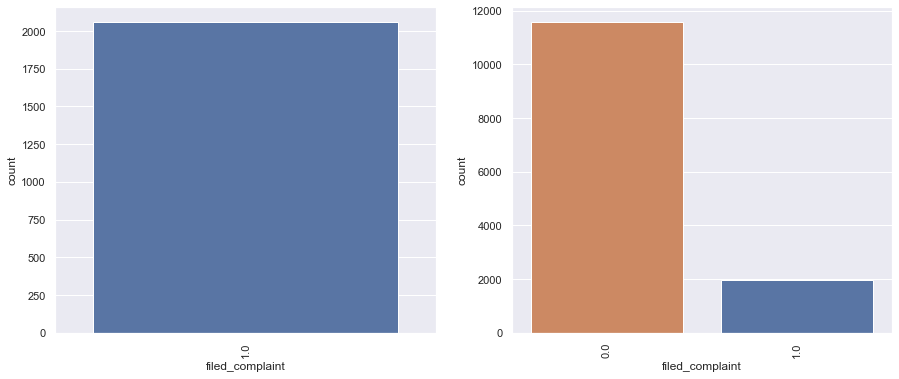

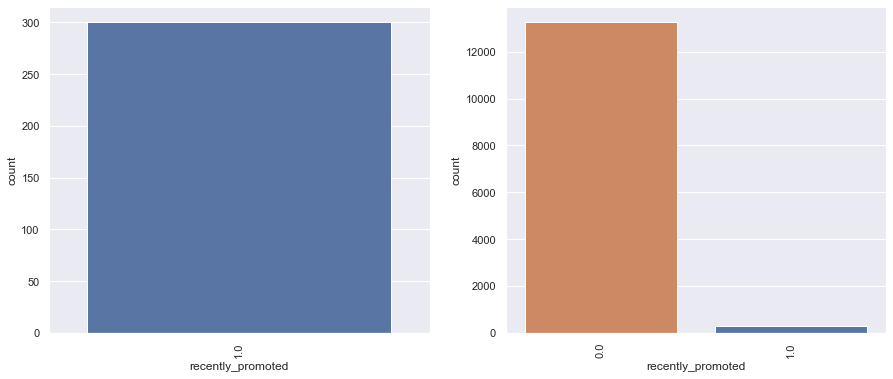

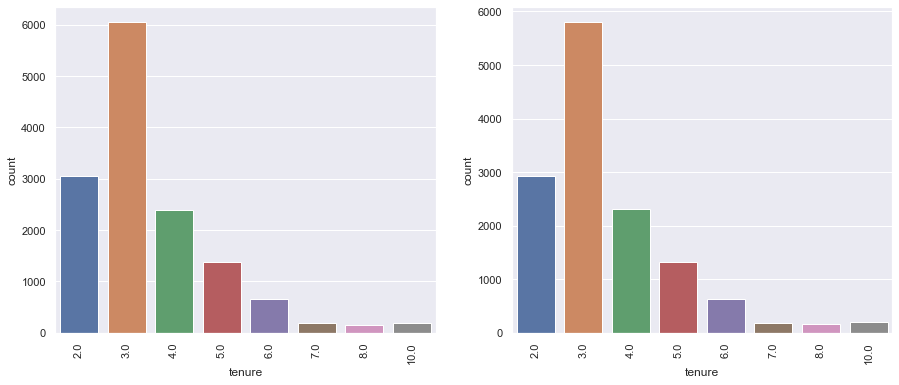

In [19]:
after_bar('filed_complaint')
after_bar('recently_promoted')
after_bar('tenure')

<h3>last_evaluation, satisfaction</h3>

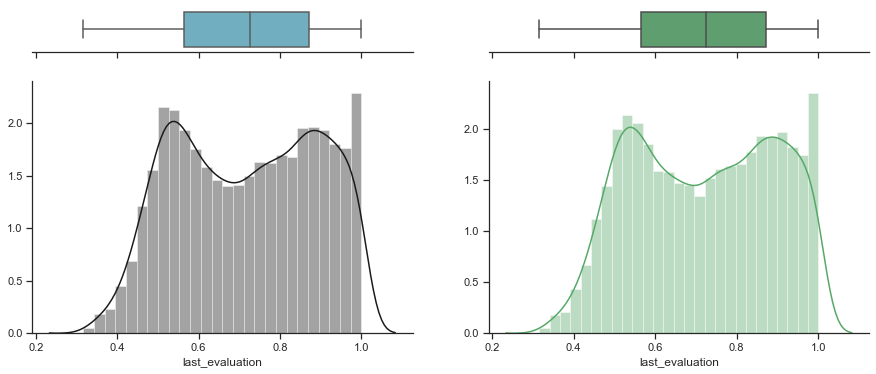

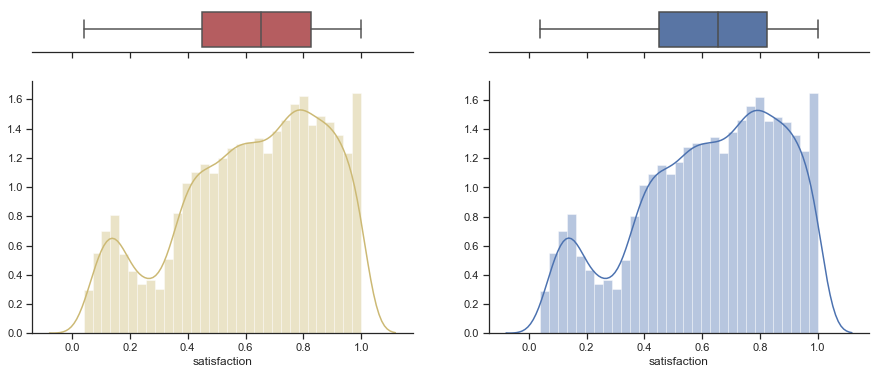

In [20]:
after_distribusi('last_evaluation')
after_distribusi('satisfaction')

<center><h2>Processing</h2></center>

<p><strong>Pertama-tama</strong> akan diperlihatkan scatter plot dari masing-masing variable numerik yang dipakai. Lalu tiap titik tersebut dibedakan menjadi 2 warna yang menjelaskan tentang status karyawan saat ini.</p>

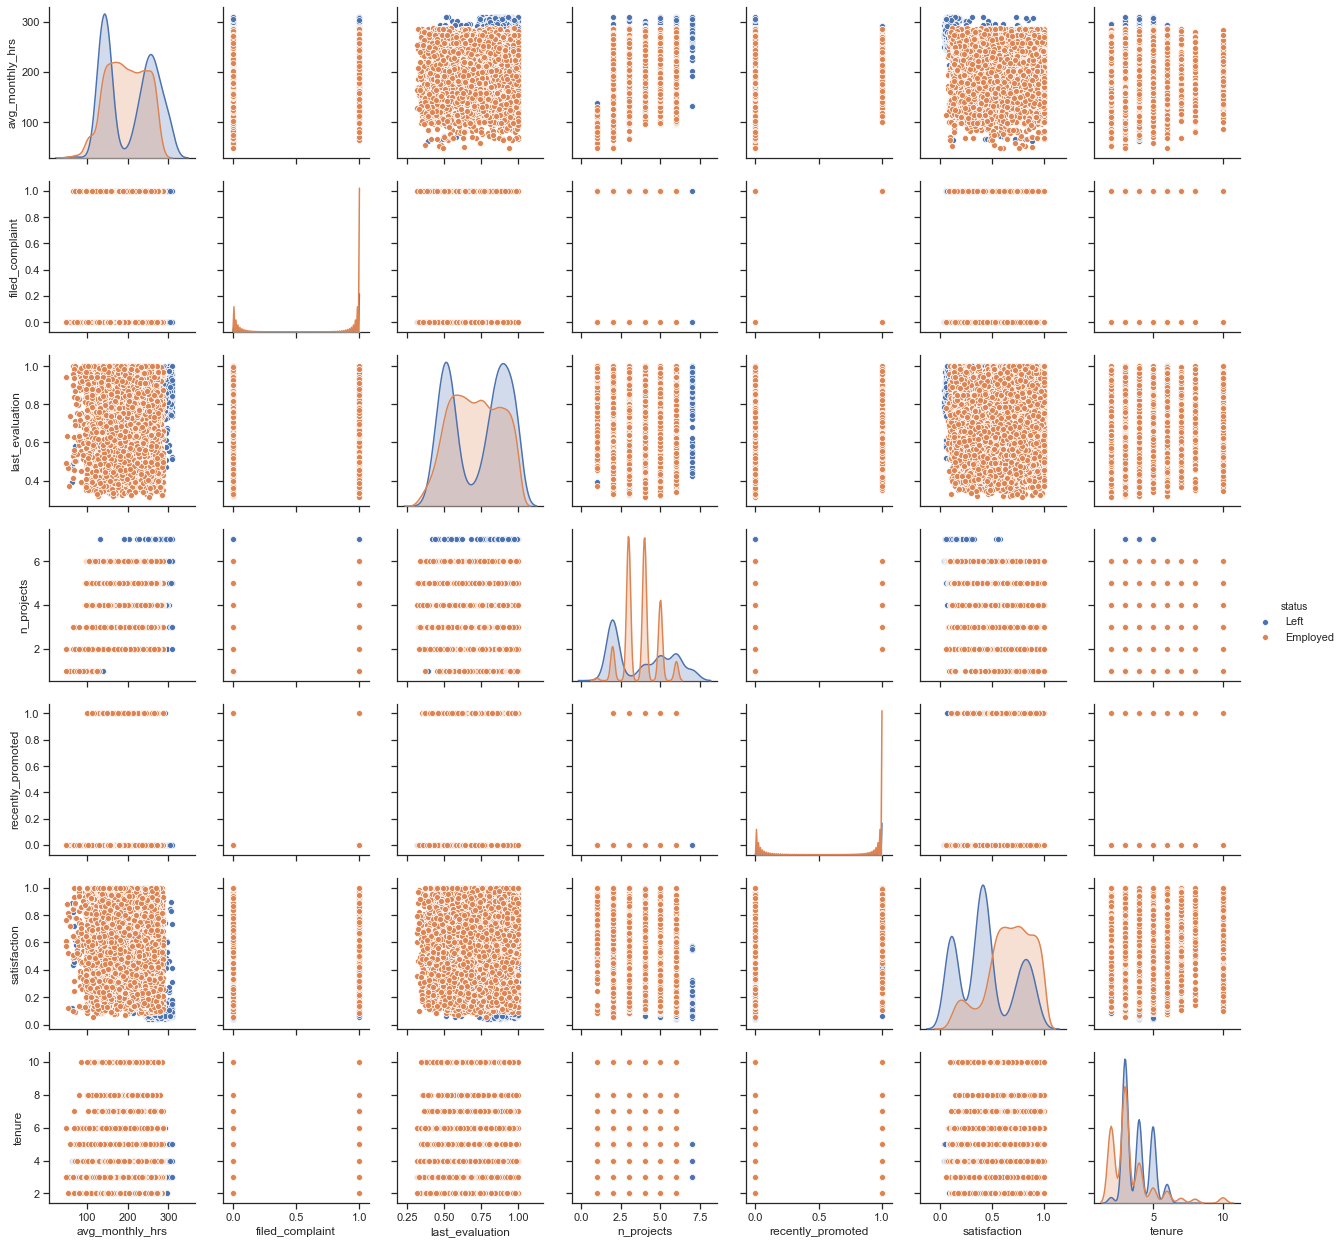

In [21]:
sns.pairplot(data, hue='status', height=2.5);

<p><strong>Lalu</strong> diberikan boxplot yang menjelaskan data kategorik(department, salary, filed_complaint, dan recently_promoted).</p>

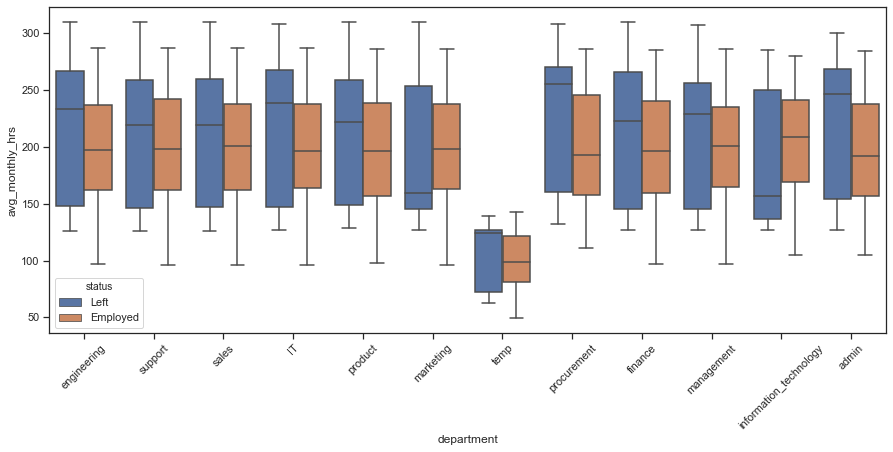

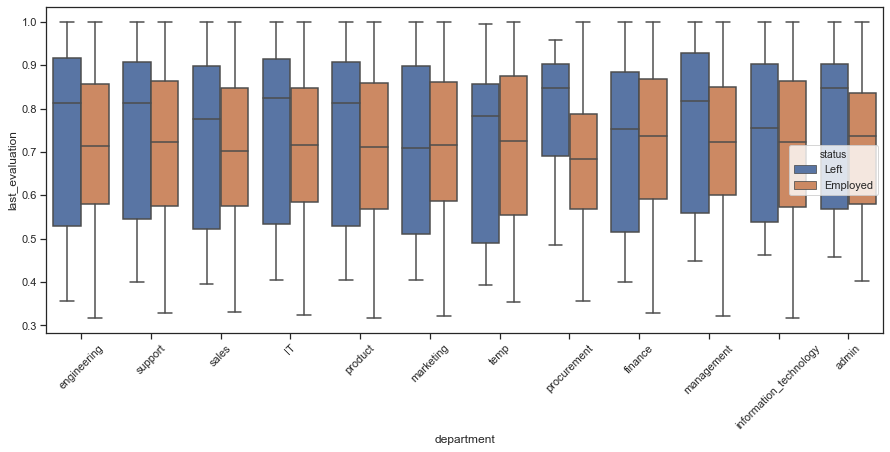

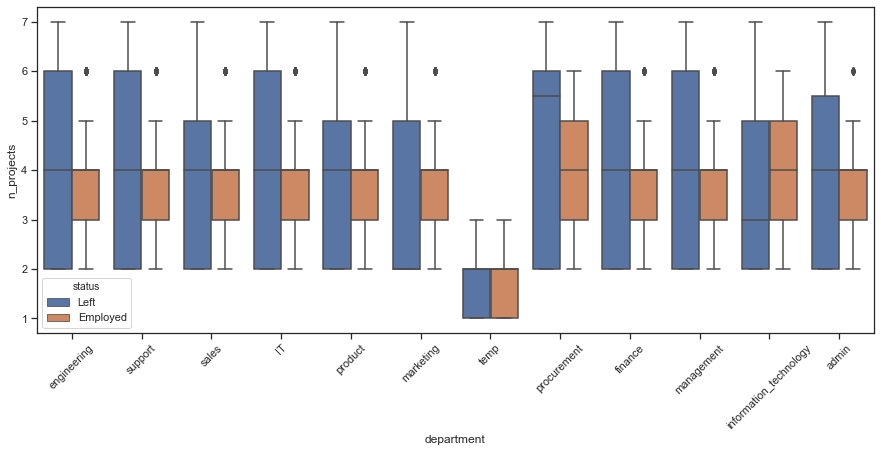

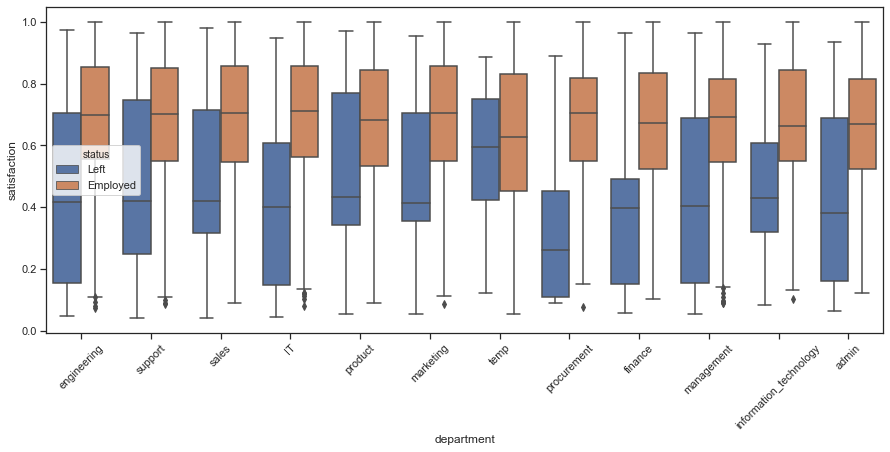

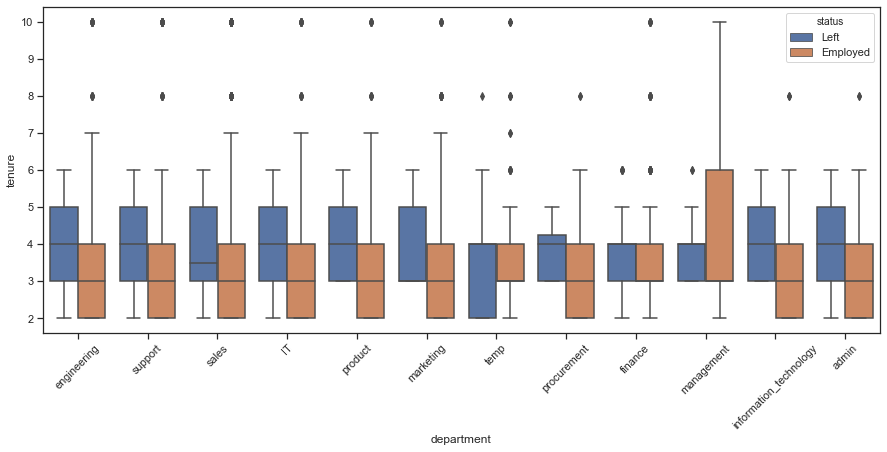

In [22]:
def box(a,j):
    f, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    ax=sns.boxplot(x=a, y=j, data=data, hue='status')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
box('department','avg_monthly_hrs')
box('department','last_evaluation')
box('department','n_projects')
box('department','satisfaction')
box('department','tenure')

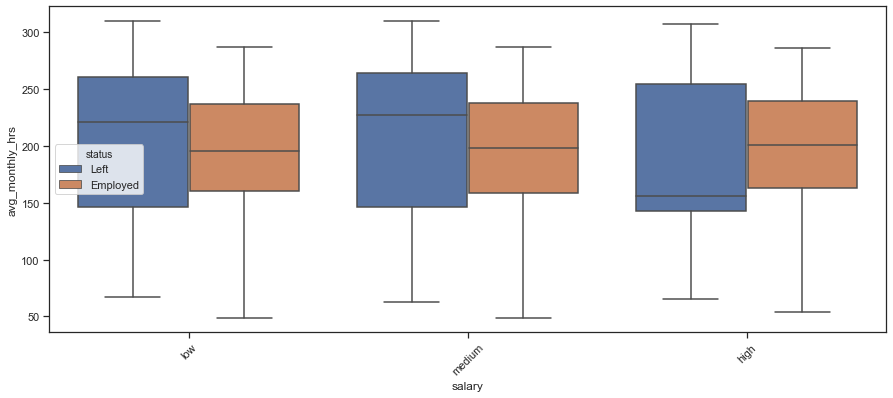

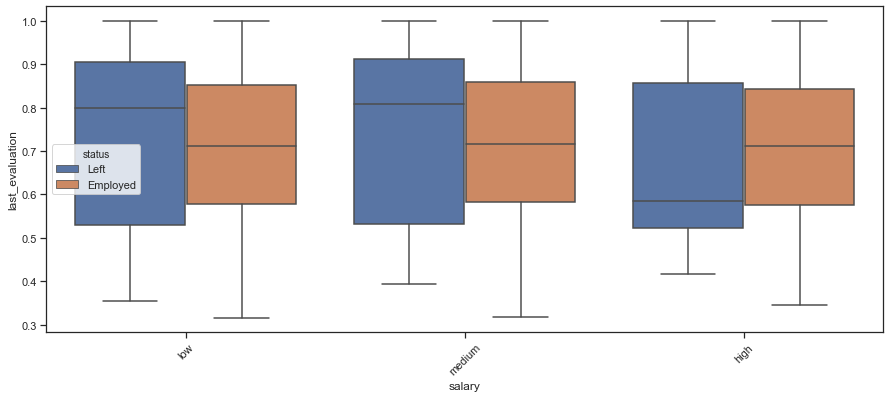

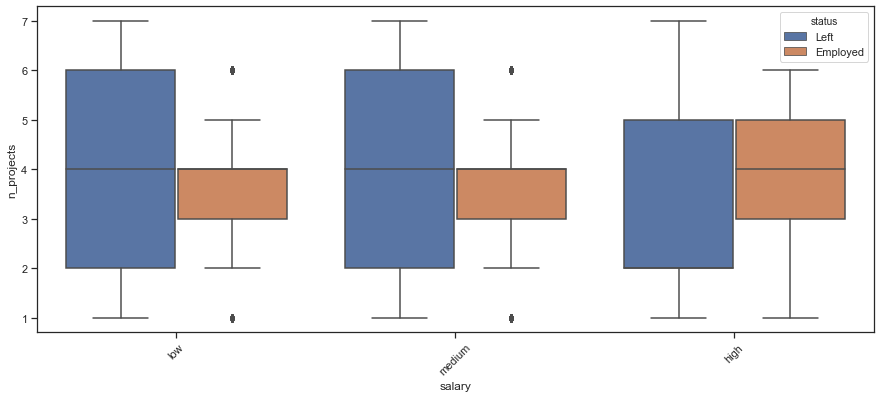

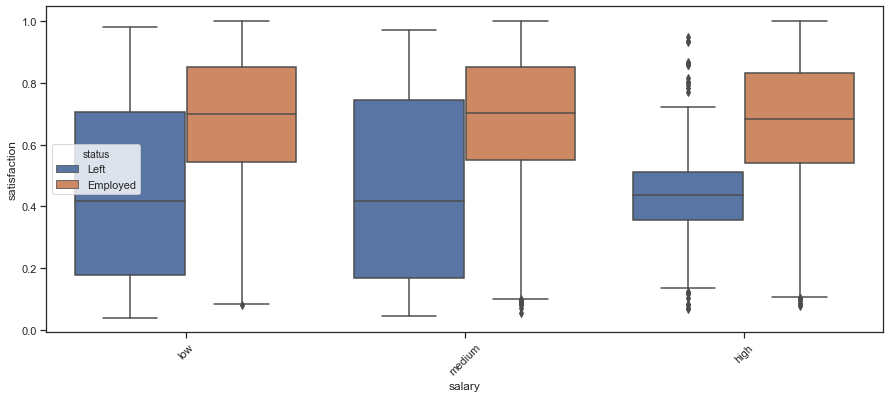

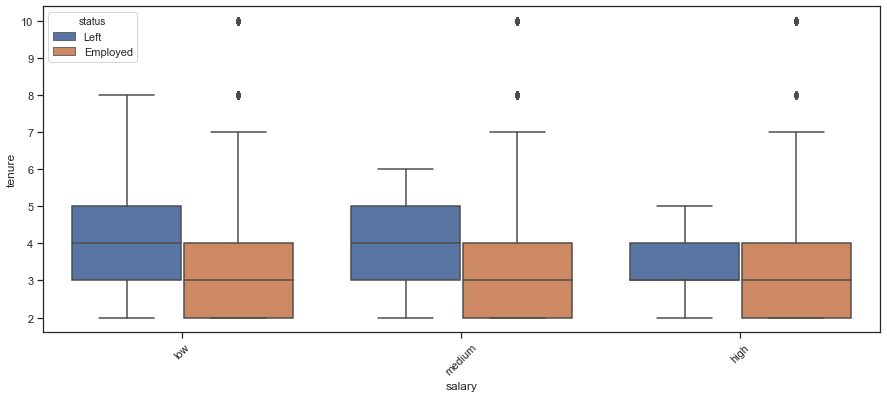

In [23]:
box('salary','avg_monthly_hrs')
box('salary','last_evaluation')
box('salary','n_projects')
box('salary','satisfaction')
box('salary','tenure')

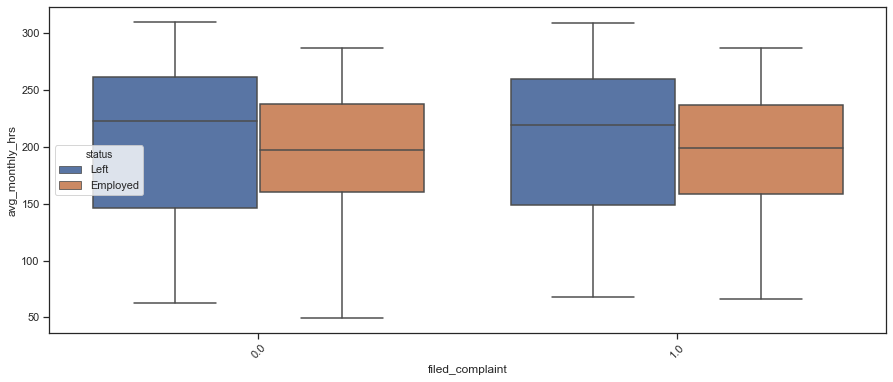

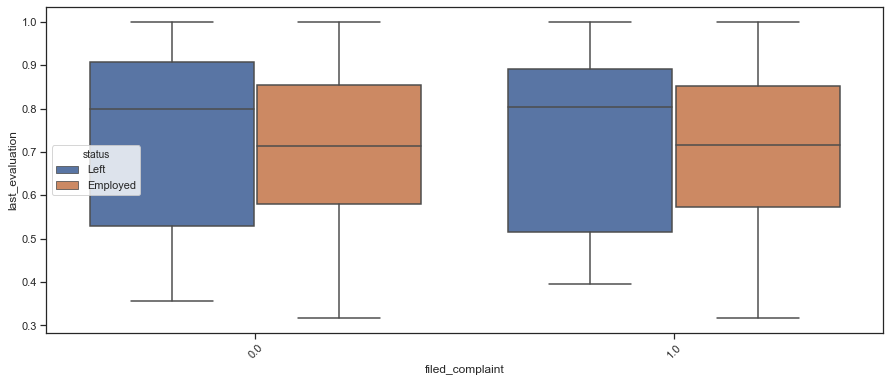

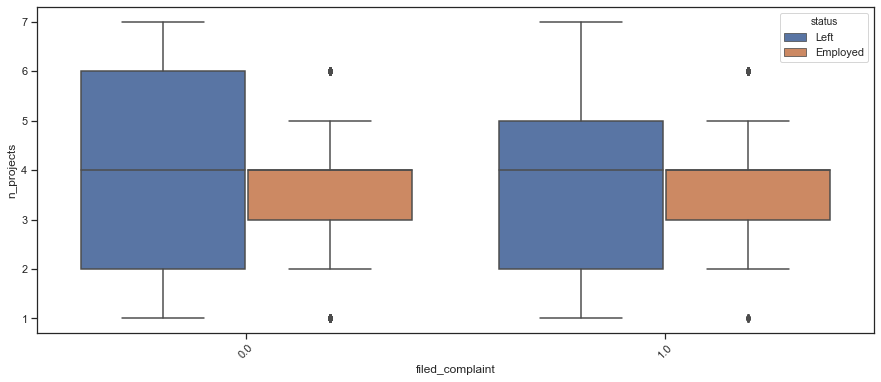

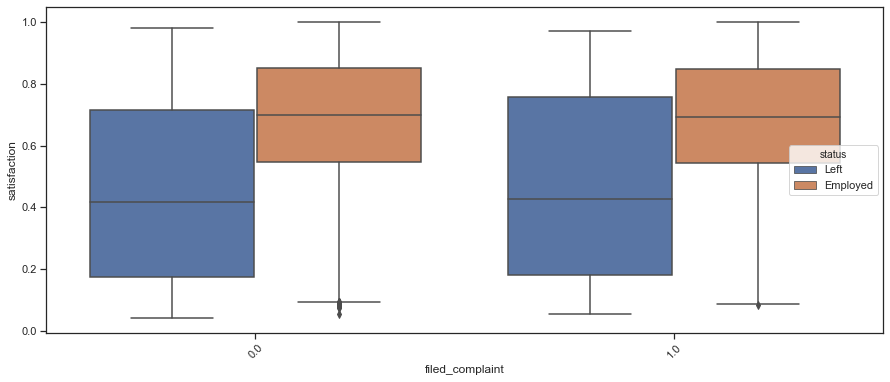

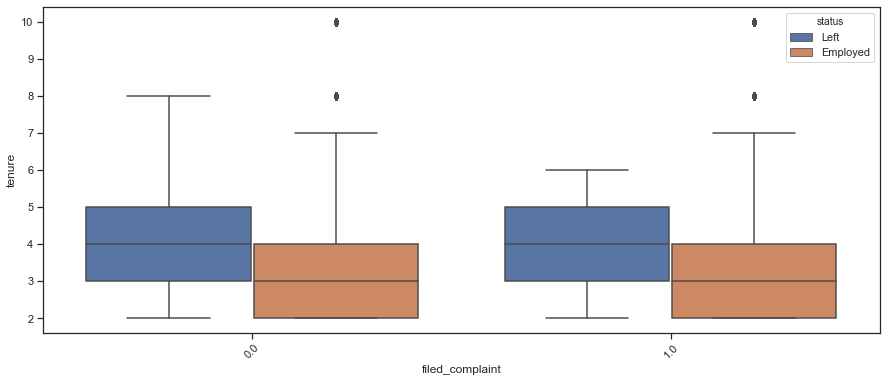

In [24]:
box('filed_complaint','avg_monthly_hrs')
box('filed_complaint','last_evaluation')
box('filed_complaint','n_projects')
box('filed_complaint','satisfaction')
box('filed_complaint','tenure')

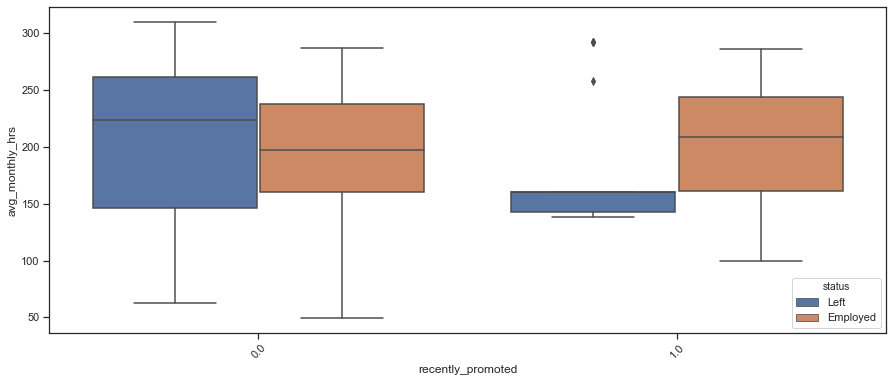

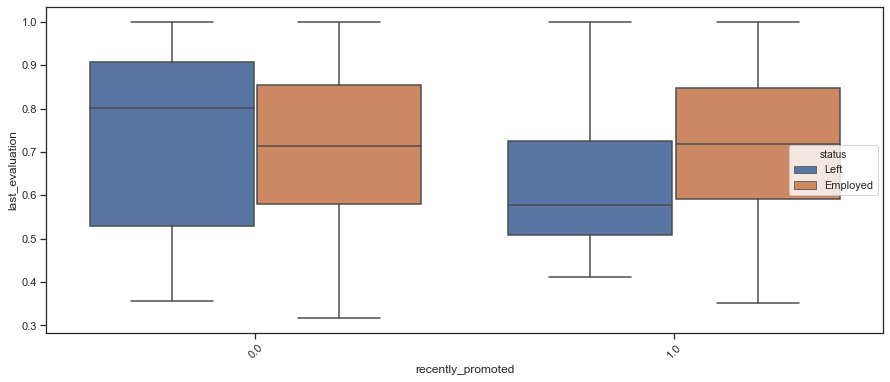

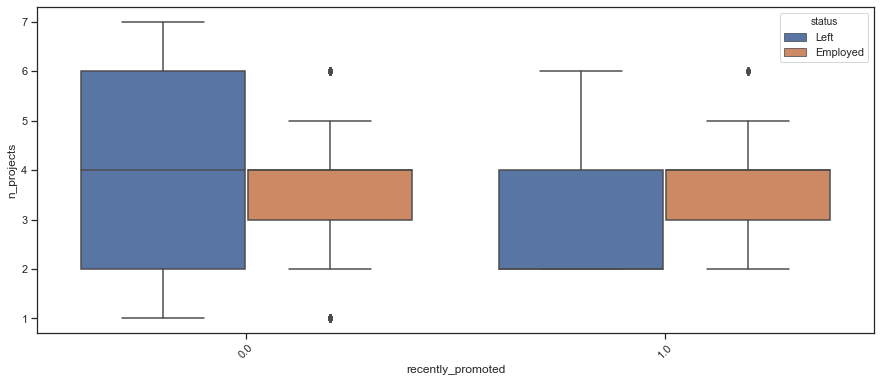

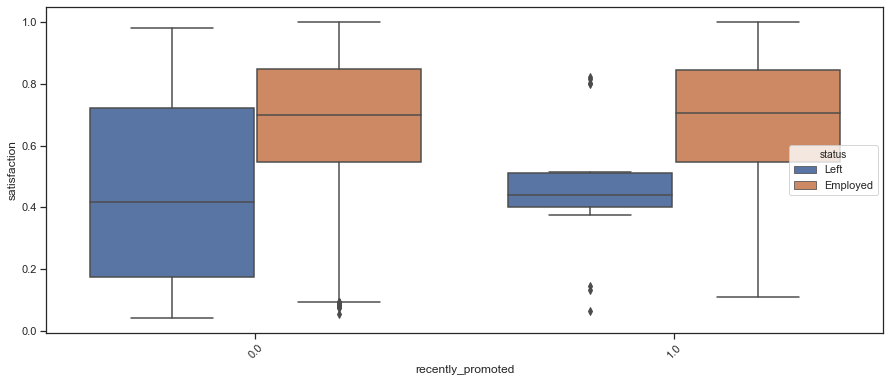

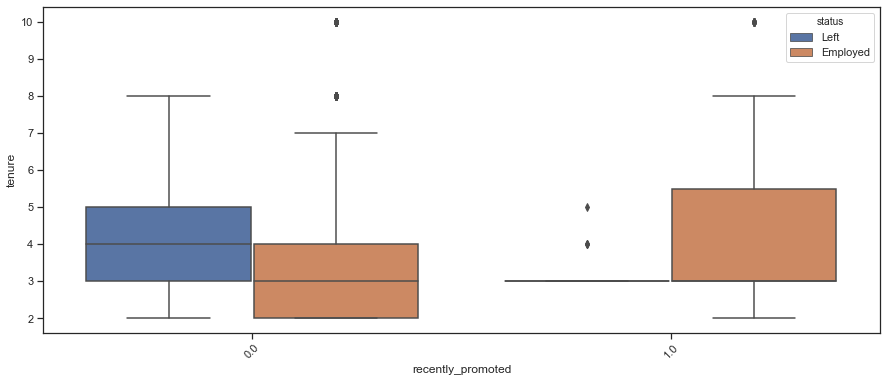

In [25]:
box('recently_promoted','avg_monthly_hrs')
box('recently_promoted','last_evaluation')
box('recently_promoted','n_projects')
box('recently_promoted','satisfaction')
box('recently_promoted','tenure')

<p><strong>Untuk</strong> data katagorik dan katagorik akan diberikan sebuah crosstab untuk menjelaskan hubungan antar variabel</p>

In [26]:
tot = pd.crosstab(data.department, [data.status,data.salary,], normalize=True)\
    .round(6)*100
dep = pd.crosstab(data.department, [data.status,data.salary,], normalize='index')\
    .round(6)*100
sal = pd.crosstab(data.department, [data.status,data.salary,], normalize='columns')\
    .round(6)*100

In [27]:
tot

status                 Employed                     Left                
salary                     high     low   medium    high     low  medium
department                                                              
IT                       0.4948  3.0502   3.1019  0.0222  1.2260  0.6795
admin                    0.0812  0.4727   0.4874  0.0074  0.1403  0.1108
engineering              1.2112  7.0606   5.9897  0.1773  2.6588  2.0458
finance                  0.4874  1.7651   1.6839  0.0369  0.6869  0.7164
information_technology   0.0960  0.5687   0.5908  0.0148  0.1108  0.1625
management               1.5288  0.8567   1.3663  0.0000  0.4210  0.2216
marketing                0.4727  1.9424   2.1935  0.0665  0.8936  0.4801
procurement              0.0665  0.5761   0.5244  0.0000  0.0591  0.0591
product                  0.4357  2.4151   2.1049  0.0443  0.7459  0.6056
sales                    1.7651  9.8671  10.2511  0.1034  4.8597  2.1270
support                  0.9380  5.3102   5.5613  0.0591  2.6736  1.1300
temp                     0.0591  0.5170   0.5761  0.0074  0.0812  0.0960

In [28]:
tot.Left.max()

salary
high      0.1773
low       4.8597
medium    2.1270
dtype: float64

In [29]:
tot[tot.Left.low>4]

status     Employed                     Left               
salary         high     low   medium    high     low medium
department                                                 
sales        1.7651  9.8671  10.2511  0.1034  4.8597  2.127

In [30]:
tot[tot.Left.medium>2.1]

status     Employed                     Left               
salary         high     low   medium    high     low medium
department                                                 
sales        1.7651  9.8671  10.2511  0.1034  4.8597  2.127

In [31]:
tot[tot.Left.high>0.17]

status      Employed                    Left                
salary          high     low  medium    high     low  medium
department                                                  
engineering   1.2112  7.0606  5.9897  0.1773  2.6588  2.0458

<h1><center>Modeling</center></h1>

<p><strong>Karena</strong> model tidak bisa mengolah data dengan tipe kategorik string, maka kolom department dan salary harus diubah dulu. Untuk kolom department akan digunakan dummy variable, karena tidak mencerminkan tingkatan apapun. Sedangkan dalam kolom salary akan digunakan LabelEncoder.<p>

In [32]:
dummy_department = pd.get_dummies(data["department"], prefix="")
dummy_department

_IT  _admin  _engineering  _finance  _information_technology  \
0        0       0             1         0                        0   
1        0       0             0         0                        0   
2        0       0             0         0                        0   
3        0       0             0         0                        0   
4        0       0             0         0                        0   
...    ...     ...           ...       ...                      ...   
14243    0       0             1         0                        0   
14244    1       0             0         0                        0   
14245    0       0             0         0                        0   
14246    0       0             0         1                        0   
14247    1       0             0         0                        0   

       _management  _marketing  _procurement  _product  _sales  _support  \
0                0           0             0         0       0         0   
1                0           0             0         0       0         1   
2                0           0             0         0       1         0   
3                0           0             0         0       1         0   
4                0           0             0         0       1         0   
...            ...         ...           ...       ...     ...       ...   
14243            0           0             0         0       0         0   
14244            0           0             0         0       0         0   
14245            0           0             0         0       1         0   
14246            0           0             0         0       0         0   
14247            0           0             0         0       0         0   

       _temp  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
14243      0  
14244      0  
14245      0  
14246      0  
14247      0  

[13540 rows x 12 columns]

In [33]:
data_model = data.copy()
data_model.drop(columns='department',inplace=True)
data_model = dummy_department.loc[:, "_admin":].join(data_model)
data_model.head()

_admin  _engineering  _finance  _information_technology  _management  \
0       0             1         0                        0            0   
1       0             0         0                        0            0   
2       0             0         0                        0            0   
3       0             0         0                        0            0   
4       0             0         0                        0            0   

   _marketing  _procurement  _product  _sales  _support  _temp  \
0           0             0         0       0         0      0   
1           0             0         0       0         1      0   
2           0             0         0       1         0      0   
3           0             0         0       1         0      0   
4           0             0         0       1         0      0   

   avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0              221              0.0         0.932868           4   
1              232              0.0         1.000000           3   
2              184              0.0         0.788830           3   
3              206              0.0         0.575688           4   
4              249              0.0         0.845217           3   

   recently_promoted  salary  satisfaction  tenure    status  
0                0.0     low      0.829896     5.0      Left  
1                0.0     low      0.834544     2.0  Employed  
2                0.0  medium      0.834988     3.0  Employed  
3                0.0     low      0.424764     2.0  Employed  
4                0.0     low      0.779043     3.0  Employed

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_model.salary = le.fit_transform(data_model.salary)
encoder = preprocessing.LabelEncoder()
encoder.fit(data_model.salary)
np.save('classes.npy', encoder.classes_)
data_model.status = le.fit_transform(data_model.status)
data_model.head()

_admin  _engineering  _finance  _information_technology  _management  \
0       0             1         0                        0            0   
1       0             0         0                        0            0   
2       0             0         0                        0            0   
3       0             0         0                        0            0   
4       0             0         0                        0            0   

   _marketing  _procurement  _product  _sales  _support  _temp  \
0           0             0         0       0         0      0   
1           0             0         0       0         1      0   
2           0             0         0       1         0      0   
3           0             0         0       1         0      0   
4           0             0         0       1         0      0   

   avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0              221              0.0         0.932868           4   
1              232              0.0         1.000000           3   
2              184              0.0         0.788830           3   
3              206              0.0         0.575688           4   
4              249              0.0         0.845217           3   

   recently_promoted  salary  satisfaction  tenure  status  
0                0.0       1      0.829896     5.0       1  
1                0.0       1      0.834544     2.0       0  
2                0.0       2      0.834988     3.0       0  
3                0.0       1      0.424764     2.0       0  
4                0.0       1      0.779043     3.0       0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
X = data_model.loc[:,:'tenure'].values
y = data_model.loc[:,'status'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

<p><strong>Demi</strong> menunjang pemahaman, berikut adalah hal-hal yang harus diperhatikan dalam mengevaluasi setiap model pada masalah klasifikasi.</p>
<ul>
    <li><a href="https://www.youtube.com/watch?v=Kdsp6soqA7o">Confusion Matrix</a></li>
    <li><a href="https://www.youtube.com/watch?v=VPZiJGNX4_s">Accuracy, Precision, and Recall</a></li>
    <li><a href="https://www.youtube.com/watch?v=4jRBRDbJemM">ROC and AUC</a></li>
</ul>

<h2><strong><font color="green">Logistic Regression</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model Logistic Regression bisa dilihat <a href="https://www.geeksforgeeks.org/understanding-logistic-regression/">di sini</a>.</p>

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scale,y_train)
y_pred=logreg.predict(X_test_scale)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7695716395864106
Precision: 0.5178571428571429
Recall: 0.27358490566037735


Text(0.5, 30.5, 'Predicted label')

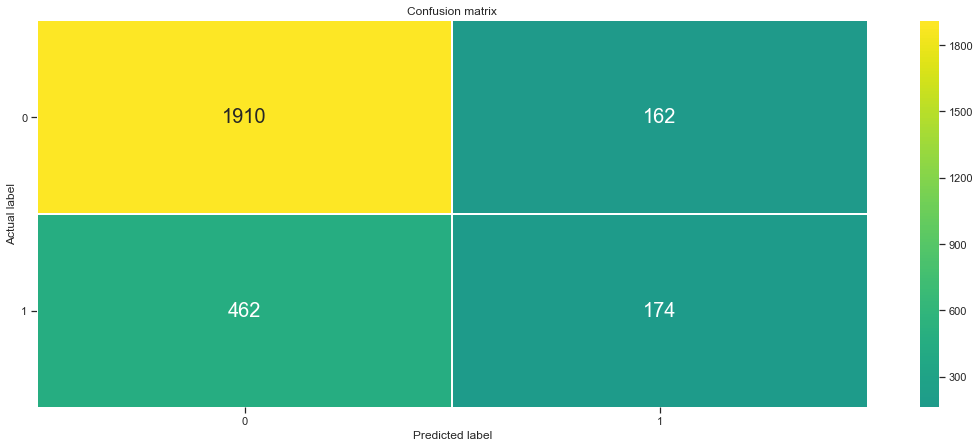

In [38]:
#Matplotlib 3.1.1 ada bug, harus downgrade ke 3.1.0
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

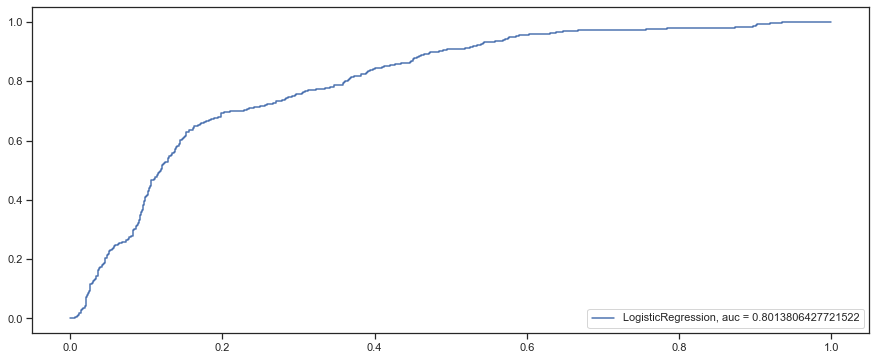

In [39]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
plt.legend(loc=4)

<h2><strong><font color="green">K-Nearest Neighbor</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model K-Nearest Neighbor bisa dilihat <a href="https://www.geeksforgeeks.org/k-nearest-neighbours/">di sini</a>.</p>

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)
y_pred=knn.predict(X_test_scale)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9435007385524372
Precision: 0.8609865470852018
Recall: 0.9056603773584906


Text(0.5, 30.5, 'Predicted label')

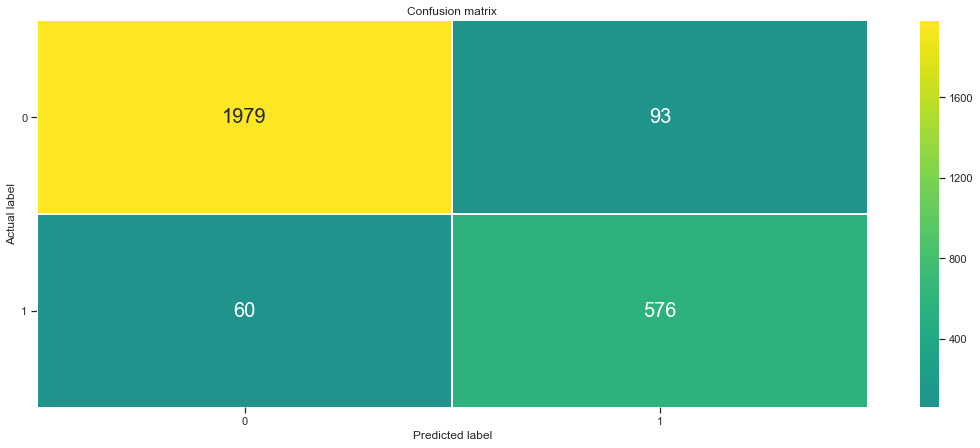

In [41]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

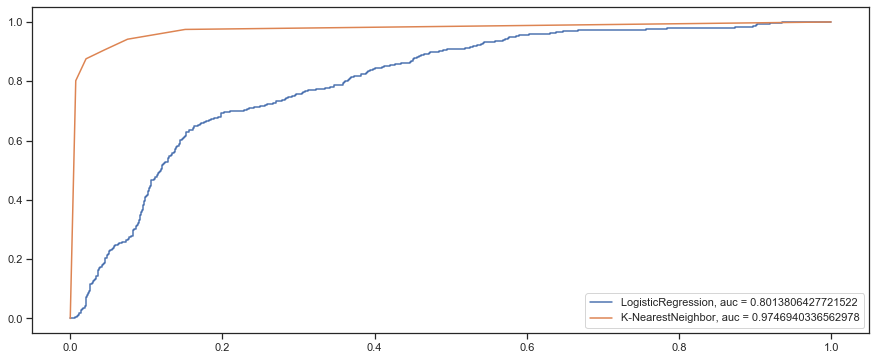

In [42]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
plt.legend(loc=4)

<p><strong>Untuk KNN</strong> akan lebih bisa dimaksimalkan dengan mengganti nilai n_neighbor, bisa menghasilkan analisa yang lebih mendalam.</p>

<h2><strong><font color="green">Decision Tree</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model Decision Tree bisa dilihat <a href="https://www.geeksforgeeks.org/decision-tree/">di sini</a>.</p>

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
clf = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9615952732644018
Precision: 0.9117647058823529
Recall: 0.9261006289308176


Text(0.5, 30.5, 'Predicted label')

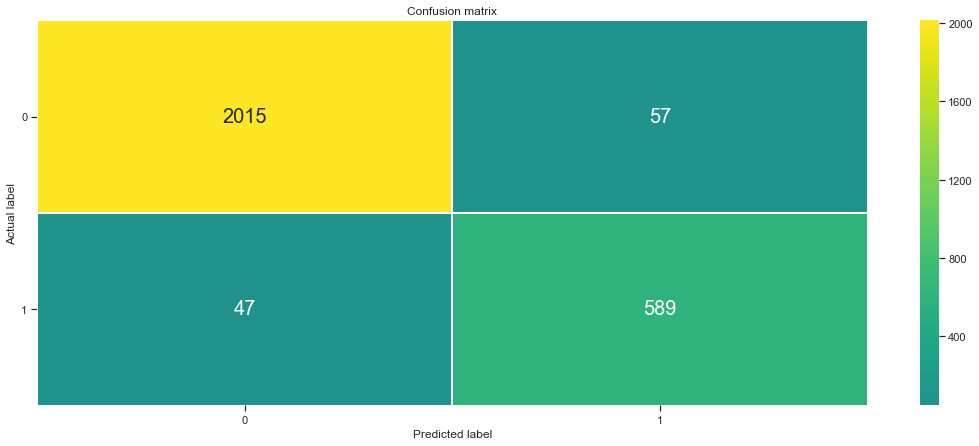

In [44]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

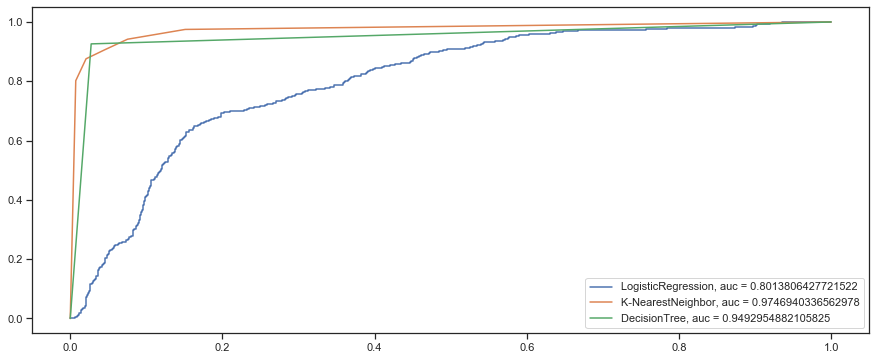

In [45]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
plt.legend(loc=4)

In [46]:
#Jangan di running ulang, karena harus menyesuaikan beberapa variabel environment untuk pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['_admin','_engineering','_finance','_information_technology','_management','_marketing','_procurement','_product','_sales','_support','_temp','avg_monthly_hrs','filed_complaint','last_evaluation','n_projects','recently_promoted','salary','satisfaction','tenure'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<h2><strong><font color="green">Random Forest</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model Random Forest bisa dilihat <a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">di sini</a>.</p>

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.982274741506647
Precision: 0.9835526315789473
Recall: 0.940251572327044


Text(0.5, 30.5, 'Predicted label')

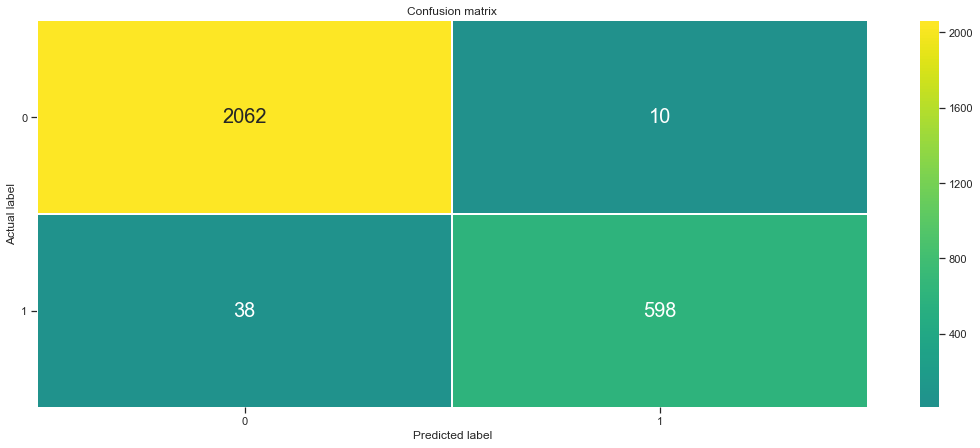

In [48]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

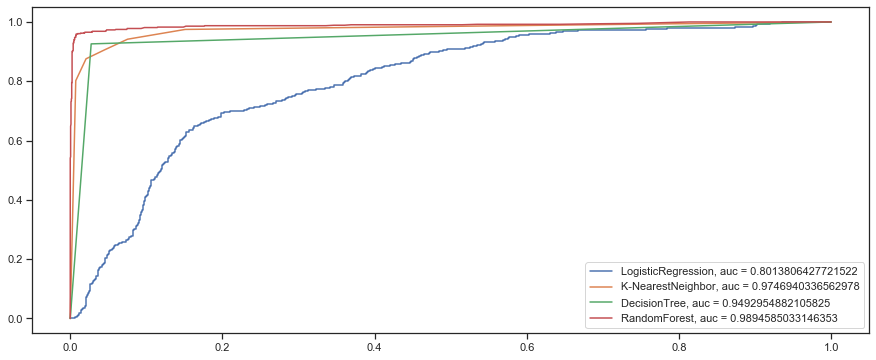

In [49]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
plt.legend(loc=4)

<h2><strong><font color="green">SVM</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model Support Vector Machine bisa dilihat <a href="https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496">di sini</a>.</p>

In [50]:
from sklearn.svm import SVC
svl = SVC(kernel = 'linear',probability=True)
svl.fit(X_train_scale, y_train)
y_pred = svl.predict(X_test_scale)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7651403249630724
Precision: 0.0
Recall: 0.0


Text(0.5, 30.5, 'Predicted label')

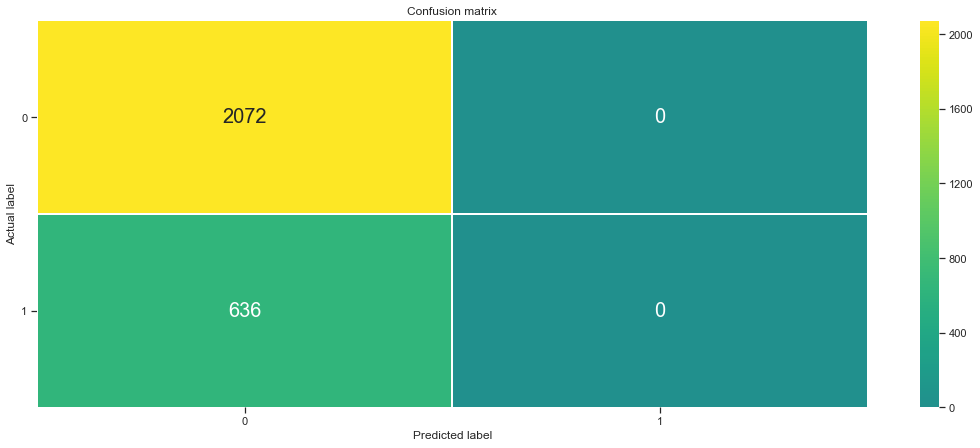

In [51]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

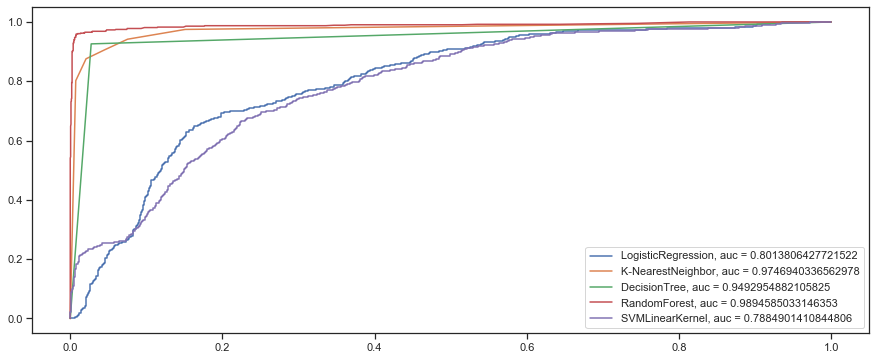

In [52]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba4 = svl.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr4, tpr4, _4 = metrics.roc_curve(y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax4 = plt.plot(fpr4,tpr4,label="SVMLinearKernel, auc = "+str(auc4))
plt.legend(loc=4)

<h2><strong><font color="green">Kernel SVM (Sigmoid)</font></strong></h2>

In [53]:
svs = SVC(kernel = 'sigmoid',probability=True)
svs.fit(X_train_scale, y_train)
y_pred = svs.predict(X_test_scale)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.630354505169867
Precision: 0.1746880570409982
Recall: 0.1540880503144654


Text(0.5, 30.5, 'Predicted label')

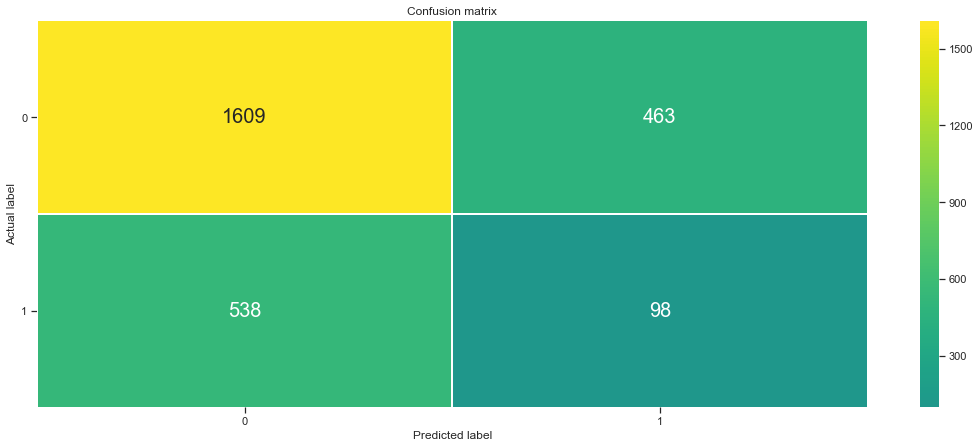

In [54]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

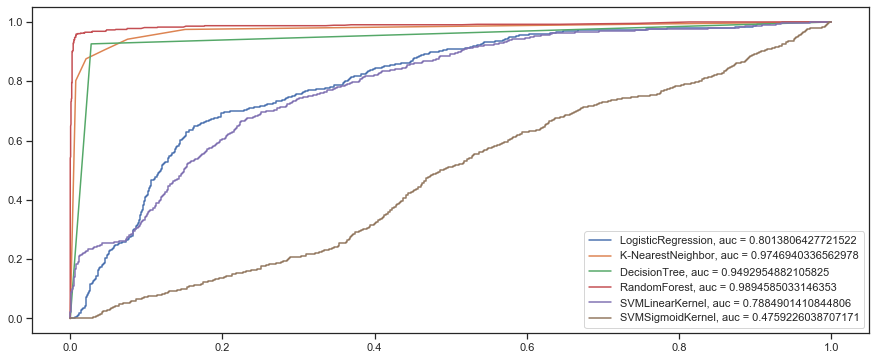

In [55]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba4 = svl.predict_proba(X_test_scale)[::,1]
y_pred_proba5 = svs.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr4, tpr4, _4 = metrics.roc_curve(y_test,  y_pred_proba4)
fpr5, tpr5, _5 = metrics.roc_curve(y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba5)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax4 = plt.plot(fpr4,tpr4,label="SVMLinearKernel, auc = "+str(auc4))
ax5 = plt.plot(fpr5,tpr5,label="SVMSigmoidKernel, auc = "+str(auc5))
plt.legend(loc=4)

<h2><strong><font color="green">Kernel SVM (Gaussian)</font></strong></h2>

In [56]:
svg = SVC(kernel = 'rbf',probability=True)
svg.fit(X_train_scale, y_train)
y_pred = svg.predict(X_test_scale)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9460856720827179
Precision: 0.8901273885350318
Recall: 0.8789308176100629


Text(0.5, 30.5, 'Predicted label')

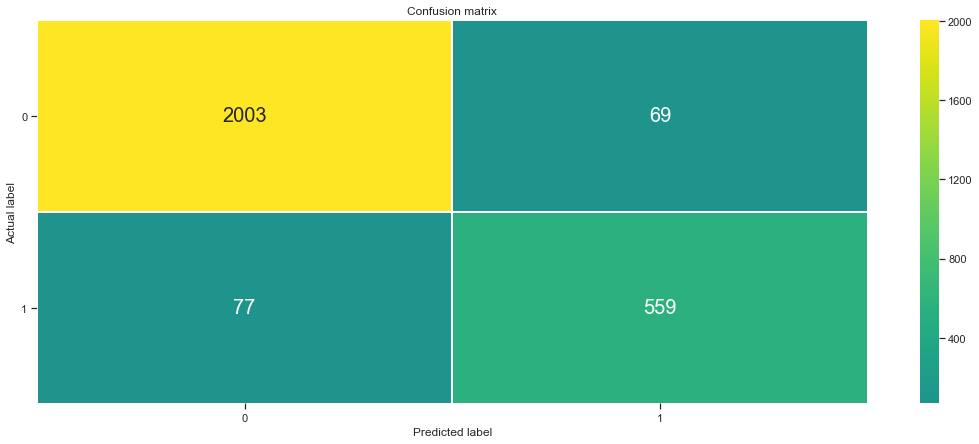

In [57]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

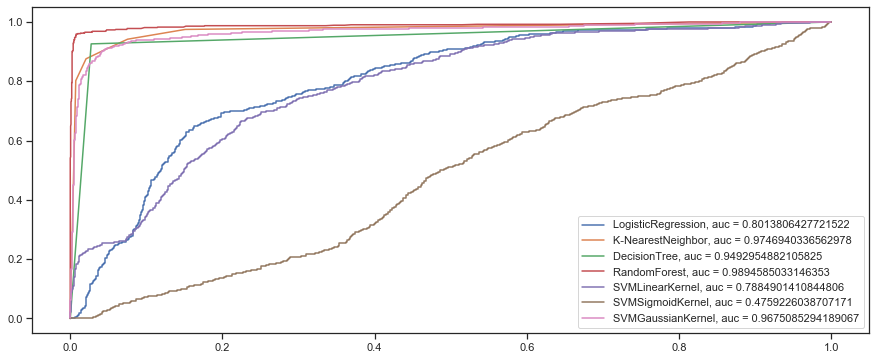

In [58]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba4 = svl.predict_proba(X_test_scale)[::,1]
y_pred_proba5 = svs.predict_proba(X_test_scale)[::,1]
y_pred_proba6 = svg.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr4, tpr4, _4 = metrics.roc_curve(y_test,  y_pred_proba4)
fpr5, tpr5, _5 = metrics.roc_curve(y_test,  y_pred_proba5)
fpr6, tpr6, _6 = metrics.roc_curve(y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba5)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba6)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax4 = plt.plot(fpr4,tpr4,label="SVMLinearKernel, auc = "+str(auc4))
ax5 = plt.plot(fpr5,tpr5,label="SVMSigmoidKernel, auc = "+str(auc5))
ax6 = plt.plot(fpr6,tpr6,label="SVMGaussianKernel, auc = "+str(auc6))
plt.legend(loc=4)

<h2><strong><font color="green">Naive Baiyes</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model Naive Baiyes bisa dilihat <a href="https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0">di sini</a>.</p>

In [59]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = svg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7651403249630724
Precision: 0.0
Recall: 0.0


Text(0.5, 30.5, 'Predicted label')

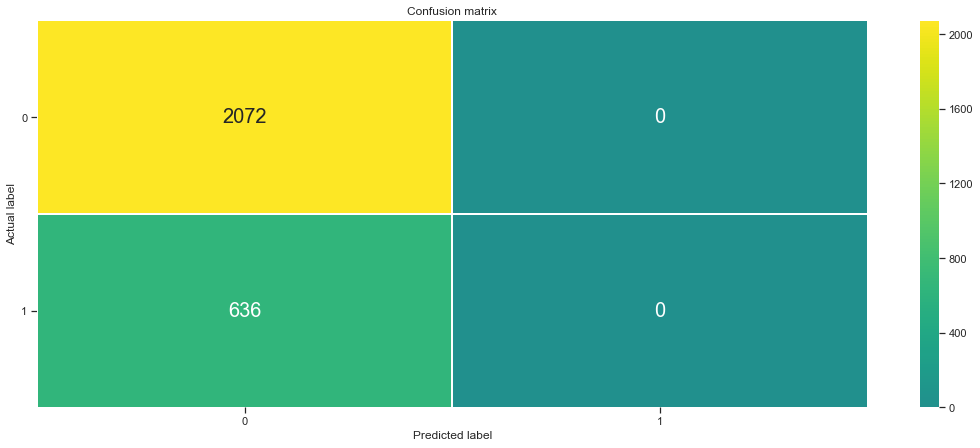

In [60]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

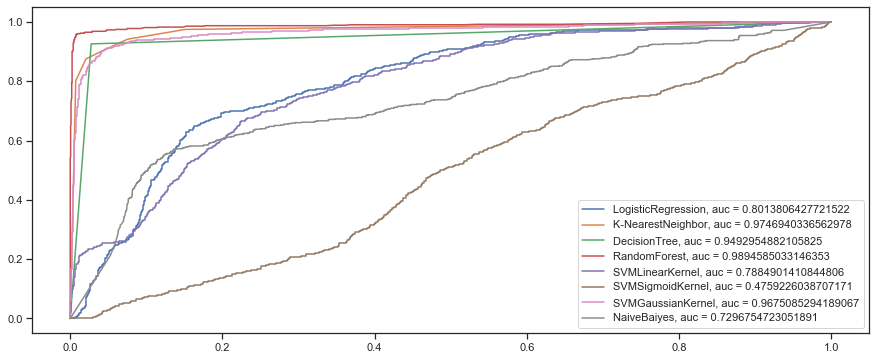

In [61]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba4 = svl.predict_proba(X_test_scale)[::,1]
y_pred_proba5 = svs.predict_proba(X_test_scale)[::,1]
y_pred_proba6 = svg.predict_proba(X_test_scale)[::,1]
y_pred_proba7 = NB.predict_proba(X_test_scale)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr4, tpr4, _4 = metrics.roc_curve(y_test,  y_pred_proba4)
fpr5, tpr5, _5 = metrics.roc_curve(y_test,  y_pred_proba5)
fpr6, tpr6, _6 = metrics.roc_curve(y_test,  y_pred_proba6)
fpr7, tpr7, _7 = metrics.roc_curve(y_test,  y_pred_proba7)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba5)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba6)
auc7 = metrics.roc_auc_score(y_test, y_pred_proba7)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax4 = plt.plot(fpr4,tpr4,label="SVMLinearKernel, auc = "+str(auc4))
ax5 = plt.plot(fpr5,tpr5,label="SVMSigmoidKernel, auc = "+str(auc5))
ax6 = plt.plot(fpr6,tpr6,label="SVMGaussianKernel, auc = "+str(auc6))
ax7 = plt.plot(fpr7,tpr7,label="NaiveBaiyes, auc = "+str(auc7))
plt.legend(loc=4)

<h2><strong><font color="green">AdaBoost</font></strong></h2>

<p><strong>Untuk</strong> materi tentang matematika dibalik model AdaBoost bisa dilihat <a href="https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe">di sini</a>.</p>

In [62]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier(n_estimators=1000)
AB.fit(X_train, y_train)
y_pred = AB.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.930576070901034
Precision: 0.8624595469255664
Recall: 0.8380503144654088


Text(0.5, 30.5, 'Predicted label')

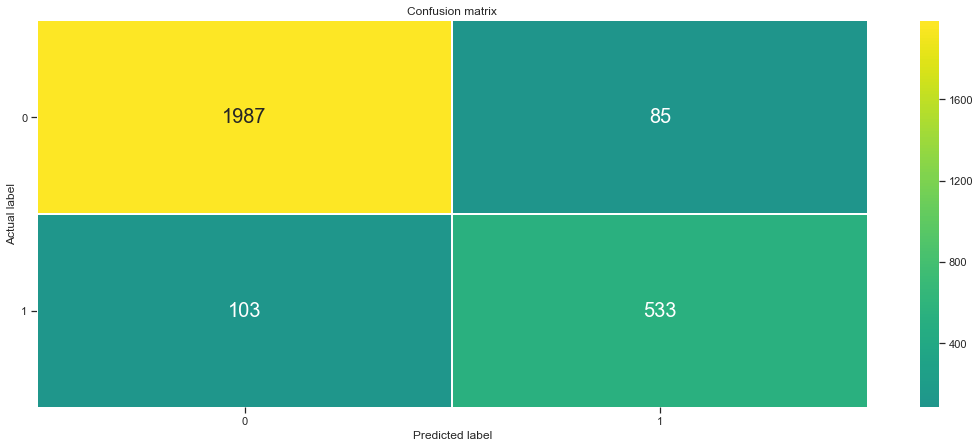

In [63]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, center=True, cmap="viridis" , ax=ax,fmt='d',linewidths=.5, annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

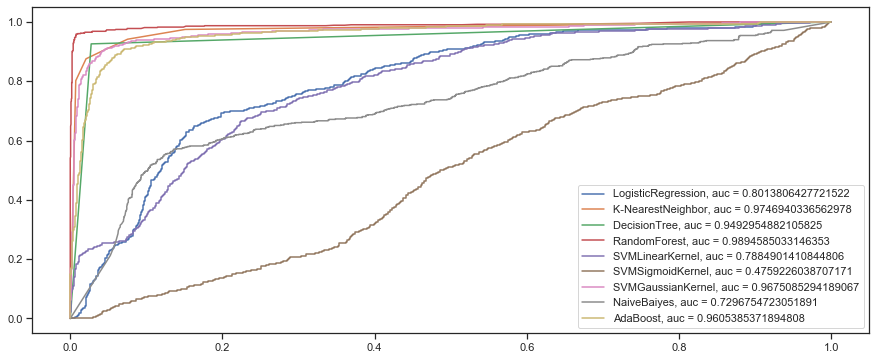

In [64]:
y_pred_proba = logreg.predict_proba(X_test_scale)[::,1]
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba4 = svl.predict_proba(X_test_scale)[::,1]
y_pred_proba5 = svs.predict_proba(X_test_scale)[::,1]
y_pred_proba6 = svg.predict_proba(X_test_scale)[::,1]
y_pred_proba7 = NB.predict_proba(X_test_scale)[::,1]
y_pred_proba8 = AB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr4, tpr4, _4 = metrics.roc_curve(y_test,  y_pred_proba4)
fpr5, tpr5, _5 = metrics.roc_curve(y_test,  y_pred_proba5)
fpr6, tpr6, _6 = metrics.roc_curve(y_test,  y_pred_proba6)
fpr7, tpr7, _7 = metrics.roc_curve(y_test,  y_pred_proba7)
fpr8, tpr8, _8 = metrics.roc_curve(y_test,  y_pred_proba8)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba5)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba6)
auc7 = metrics.roc_auc_score(y_test, y_pred_proba7)
auc8 = metrics.roc_auc_score(y_test, y_pred_proba8)
ax = plt.plot(fpr,tpr,label="LogisticRegression, auc = "+str(auc))
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax4 = plt.plot(fpr4,tpr4,label="SVMLinearKernel, auc = "+str(auc4))
ax5 = plt.plot(fpr5,tpr5,label="SVMSigmoidKernel, auc = "+str(auc5))
ax6 = plt.plot(fpr6,tpr6,label="SVMGaussianKernel, auc = "+str(auc6))
ax7 = plt.plot(fpr7,tpr7,label="NaiveBaiyes, auc = "+str(auc7))
ax8 = plt.plot(fpr8,tpr8,label="AdaBoost, auc = "+str(auc8))
plt.legend(loc=4)

<h1><center>Analisis</center></h1>

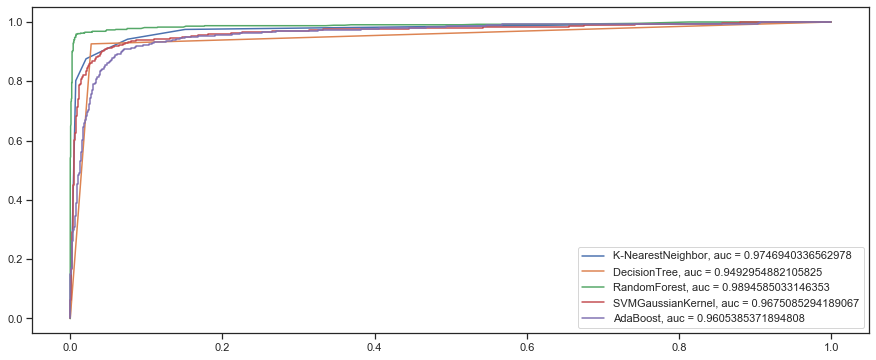

In [65]:
y_pred_proba1 = knn.predict_proba(X_test_scale)[::,1]
y_pred_proba2 = tree.predict_proba(X_test)[::,1]
y_pred_proba3 = rf.predict_proba(X_test)[::,1]
y_pred_proba6 = svg.predict_proba(X_test_scale)[::,1]
y_pred_proba8 = AB.predict_proba(X_test)[::,1]
fpr1, tpr1, _1 = metrics.roc_curve(y_test,  y_pred_proba1)
fpr2, tpr2, _2 = metrics.roc_curve(y_test,  y_pred_proba2)
fpr3, tpr3, _3 = metrics.roc_curve(y_test,  y_pred_proba3)
fpr6, tpr6, _6 = metrics.roc_curve(y_test,  y_pred_proba6)
fpr8, tpr8, _8 = metrics.roc_curve(y_test,  y_pred_proba8)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba6)
auc8 = metrics.roc_auc_score(y_test, y_pred_proba8)
ax1 = plt.plot(fpr1,tpr1,label="K-NearestNeighbor, auc = "+str(auc1))
ax2 = plt.plot(fpr2,tpr2,label="DecisionTree, auc = "+str(auc2))
ax3 = plt.plot(fpr3,tpr3,label="RandomForest, auc = "+str(auc3))
ax6 = plt.plot(fpr6,tpr6,label="SVMGaussianKernel, auc = "+str(auc6))
ax8 = plt.plot(fpr8,tpr8,label="AdaBoost, auc = "+str(auc8))
plt.legend(loc=4)

<p><strong>Berdasarkan</strong> model di atas, model yang paling bagus untuk memprediksi tinggal atau keluarnya karyawan adalah dengan menggunakan AdaBoost karena meskipun tidak mempunyai fitur sebagus yang lain dan auc tidak begitu tinggi, tapi kita bisa terhindar dari overfitting. Selain model apa yang paling bagus, kita juga bisa melihat faktor apa yang paling mempengaruhi seseorang untuk melakukan pengunduran diri atau tidak. Berdasarkan visualisasi pada decision tree sebelumnya, bisa kita lihat bahwa akar yang paling mempengaruhi adalah tingkat kepuasan karyawan. Tapi ini juga belum bisa memberikan informasi lebih lanjut. Akan kita analisa, faktor apa yang berkaitan erat dengan tingkat kepuasan.</p>

In [66]:
from scipy.stats import pearsonr
a = list(data_model.columns.values)
df = pd.DataFrame(columns =  ["Kolom", "Korelasi"])
for i in a :
    corr, _ = pearsonr(data_model.satisfaction, data_model.loc[:,i])
    isi = [i,abs(corr)]
    df.loc[-1] = isi
    df.index = df.index + 1
    df = df.sort_values(by='Korelasi', ascending=False)
df.sort_index()
df.head()

Kolom  Korelasi
2     satisfaction  1.000000
0           status  0.382758
5       n_projects  0.138830
1           tenure  0.092454
6  last_evaluation  0.074965

In [67]:
corr, _ = pearsonr(data_model.satisfaction, data_model.n_projects)
print('Korelasi kepuasan dengan banyak proyek adalah', corr)
corr, _ = pearsonr(data_model.satisfaction, data_model.tenure)
print('Korelasi kepuasan dengan masa jabatan adalah', corr)

Korelasi kepuasan dengan banyak proyek adalah -0.1388298929451591
Korelasi kepuasan dengan masa jabatan adalah -0.09245402144183967


<p><strong>Ternyata</strong> kepuasan berkaitan erat dengan banyaknya proyek dan masa jabatan. Dimana jika semakin banyak proyek yang diberikan, maka kepuasan semakin menurun dan semakin lama masa jabatan, juga kepuasan semakin menurun.</p>

<h1><center>Kesimpulan</center></h1>

<p><strong>Jadi</strong> rekomendasi untuk perusahaan adalah agar tidak memberikan proyek telalu banyak kepada satu karyawan. Lalu memberikan suatu penghargaan bagi karyawan-karyawan yang memang sudah lama bekerja, sehingga karyawan tersebut tidak menurun kepuasannya kepada perusahaan.</p>

<h1><center>Prediksi</center></h1>

In [68]:
def dataframe(a):
    df = pd.DataFrame(data = a, columns =  ['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure'])
    return df
def datamodel(a):
    a = dataframe(a)
    k = np.zeros((len(a.department), 19))
    data_model = pd.DataFrame(data = k,columns = ['_admin', '_engineering', '_finance', '_information_technology',
       '_management', '_marketing', '_procurement', '_product', '_sales',
       '_support', '_temp', 'avg_monthly_hrs', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure'])
    kol = ['avg_monthly_hrs', 'filed_complaint',
       'last_evaluation', 'n_projects', 'recently_promoted', 'salary',
       'satisfaction', 'tenure']
    for l in range (0,len(a.department)):
        if a.loc[l,'department']!='IT':
            data_model.loc[l,'_'+a.loc[l,'department']] = 1
        for i in kol :
            data_model.loc[l,i] = a.loc[l,i]
    return data_model
def prediksi(a):
    a = datamodel(a)
    for l in range (0,len(a.salary)):
        if a.loc[l,'salary']=='low':
            a.loc[l,'salary']=1
        elif (a.loc[l,'salary']=='medium' or a.loc[l,'salary']=='med'):
            a.loc[l,'salary']=2
        else :
            a.loc[l,'salary']=3
    X = a.values
    y_pred = AB.predict(X)
    return y_pred

In [69]:
#[avg_monthly_hrs, department, filed_complaint, last_evaluation, n_projects, recently_promoted, 
# salary, satisfaction, tenure]
b = [[421,'engineering',0.0,0.3,6,0.0,'low',0.11,5.0],[231,'finance',0,0.56,2,1,'low',0.2,7]]
print(prediksi(b))
dataframe(b)

[1 0]


avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              421  engineering              0.0             0.30           6   
1              231      finance              0.0             0.56           2   

   recently_promoted salary  satisfaction  tenure  
0                0.0    low          0.11     5.0  
1                1.0    low          0.20     7.0